## Base de datos
$$ Callen Ailen $$

$$ailen.callen@mi.unc.edu.ar$$

**1.INTRODUCCIÓN**

Debido a que las nuevas tecnologías aportan grandes cantidades de datos, surgio la necesidad de almacenar los mismos de manera que su acceso sea eficiente y útil. En general, la información de grandes relevamientos, simulaciones numéricas, etc. está organizada en Bases de Datos. Una Base de datos se define como un conjunto de datos pertenecientes a un mismo contexto y almacenados sistemáticamente para su registro.

Uno de los paradigmas más utilizados para organizar bases de datos es el de Base de Datos Relacional. En este tipo de modelo la información se organiza en tablas(conjunto de datos con ciertas características en común), que se relacionan entre sí a partir de una propiedad de los datos. Cada tabla es un conjunto de registros, donde un registro es un objeto  ́unico de datos implícitamente estructurados en una tabla. Corresponde a una fila en las tablas. Ademas, una columna de una tabla se lo denomina campo, es la mínima unidad de información a la que se puede acceder. 

Existen programas o sistemas de gestión de bases de datos relacionales. Entre los más conocidos, se destacan por ejemplo MySQL, PostgreSQL, Oracle y Microsoft SQL Server. 


Uno de los lenguajes más utilizados para manipular y acceder a bases de datos es el denominado SQL (Structured Query Languaje). Con este lenguaje se pueden crear, modificar y consultar bases de datos. SQL se divide en dos partes, un lenguaje de manipulación de datos y un lenguaje de definición de datos. Para extraer información de una base de datos se requiere la parte de manipulación de datos cuyas instrucciones principales son:

SELECT, FROM, INSERT INTO, WHERE


Un query básico de SQL tiene la siguiente forma:

SELECT nombre(s)_de_columna(s)


FROM nombre_de_la_tabla


WHERE nombre_columna operador valor


donde "operador” puede ser AND, OR, >, <, ==, !=.

En el siguiente trabajo se propone manipular datos de observatorios virtuales, en particular usando un catálogo de galaxias de la base de datos SDSS y realizar un anilisis de morfología, magnitudes y redshift. 

**2.1 Procedimiento**

Para poder realizar el análisis primero se ingresó al sitio de CasJobs: http://skyservice.pha.jhu.edu/casjobs/default.aspx y se creó una cuenta de ususario. Luego, se estudio el sitio web identificando los elementos principales de la base de datos: tablas, campos y registros. Además, se exploró la estructura de la base de datos usando Skyserver → SQL-Search para la obtencion de la tabla de datos. A esta tabla se le pidio que tenga datos de galaxias, en particular magnitudes Petrosianas en las bandas u, g y r, redshift y clasificación como eliptica o espiral. La lista de galaxias se obtuvo con el siguiente query:

SELECT TOP 200000 

ph.objID AS ID, ph.petroMag_r AS R, ph.petroMag_u AS U, ph.petroMag_g AS G, sp.z AS Z, zoo.p_el AS E, zoo.p_cs AS S


FROM photoObjAll AS ph JOIN SpecObjAll AS Sp ON  ph.objID = Sp.bestObjID JOIN zooVotes AS zoo ON ph.ObjID = zoo.objID
  
WHERE 


     M=0
      
     AND R>-100
     
     AND U>-100
      
     AND G>-100
     
     AND Sp.class="GALAXY"


In [175]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats
df=pd.read_csv("tabla_limpia.csv",sep=' ',names=['ID','R','U','G','Z','E','S'])


**2.DATOS Y RESULTADOS**

**2.1 PROBLEMA 2**

Estudie la distribución de  ́ındices de color g-r y u-g para galaxias elípticas y espirales. Determinar si para ambos casos las distribuciones son consistentes. Discuta la validez de la forma de la distribución propuesta para el estadístico de la prueba
Para realizar esta comparación se usó el test de Kolmogórov-Smirnov o test K-S. Este test consiste en calcular la acumulada de cada conjunto de datos y ver la diferencia maxima de distancia entre ambas curvas. Esta distancia es lo que se toma como estadistico de prueba y que luego podria compararse con un valor de tabla y realizar una comparacion mediante el metodo de hipotesis nula e hipotesis alternativa. Otra forma de hacer la comparacion es elijiendo un intervalo de confianza y viendo si el valor del p-value es menor a este. 
Para este trabajo se va a elejir un nivel de confianza $$ \alpha =0.05$$


In [176]:
df

,ID,R,U,G,Z,E,S
0,1237645941824356443,15.15269,17.88993,15.75731,0.040287,0.264,0.585
1,1237645942904520927,17.67662,20.60897,19.01953,0.201265,0.833,0.056
2,1237645942905438473,15.51829,17.71016,16.15184,0.025475,0.000,1.000
3,1237645942905438495,17.70742,19.56670,18.35371,0.036167,0.061,0.758
4,1237645942905503983,18.21920,22.38038,19.50568,0.160103,0.814,0.085
...,...,...,...,...,...,...,...
172935,1237661065478668846,17.60142,19.94898,18.38053,0.168244,0.333,0.524
172936,1237661065479258782,18.70579,21.19956,20.33451,0.312605,0.860,0.040
172937,1237661065479848563,17.71839,20.67775,18.71143,0.108432,0.444,0.426
172938,1237661065481617849,17.88566,19.96582,18.59777,0.102655,0.714,0.143


In [177]:
df["G - R"] = df["G"] - df["R"]
df["U - G"] = df["U"] - df["G"]

In [178]:
df

,ID,R,U,G,Z,E,S,G - R,U - G
0,1237645941824356443,15.15269,17.88993,15.75731,0.040287,0.264,0.585,0.60462,2.13262
1,1237645942904520927,17.67662,20.60897,19.01953,0.201265,0.833,0.056,1.34291,1.58944
2,1237645942905438473,15.51829,17.71016,16.15184,0.025475,0.000,1.000,0.63355,1.55832
3,1237645942905438495,17.70742,19.56670,18.35371,0.036167,0.061,0.758,0.64629,1.21299
4,1237645942905503983,18.21920,22.38038,19.50568,0.160103,0.814,0.085,1.28648,2.87470
...,...,...,...,...,...,...,...,...,...
172935,1237661065478668846,17.60142,19.94898,18.38053,0.168244,0.333,0.524,0.77911,1.56845
172936,1237661065479258782,18.70579,21.19956,20.33451,0.312605,0.860,0.040,1.62872,0.86505
172937,1237661065479848563,17.71839,20.67775,18.71143,0.108432,0.444,0.426,0.99304,1.96632
172938,1237661065481617849,17.88566,19.96582,18.59777,0.102655,0.714,0.143,0.71211,1.36805


In [179]:
elip=df[df['E']>0.9]
spir=df[df['S']>0.9]

In [180]:
elip

,ID,R,U,G,Z,E,S,G - R,U - G
42,1237645943978852560,17.08671,21.24646,18.19740,0.130705,0.940,0.030,1.11069,3.04906
60,1237645943979245850,17.77569,28.81635,19.10930,0.185352,0.913,0.000,1.33361,9.70705
63,1237645943979311247,17.59450,27.87529,18.89758,0.183479,0.913,0.043,1.30308,8.97771
79,1237645943979835605,18.20506,20.50667,19.54919,0.224972,0.902,0.000,1.34413,0.95748
92,1237648673458553624,15.85231,18.70435,16.84944,0.092808,0.923,0.077,0.99713,1.85491
...,...,...,...,...,...,...,...,...,...
172848,1237661064940946298,17.80907,20.68503,19.15819,0.225317,0.939,0.000,1.34912,1.52684
172858,1237661064942715332,16.64413,19.28103,17.55008,0.084321,0.902,0.073,0.90595,1.73095
172859,1237661064942715351,16.85368,19.60301,17.77852,0.084753,0.904,0.058,0.92484,1.82449
172918,1237661064952545410,17.37464,20.57915,18.54821,0.161877,0.921,0.048,1.17357,2.03094


In [181]:
g_r_e=elip['G - R']
g_r_s=spir['G - R']


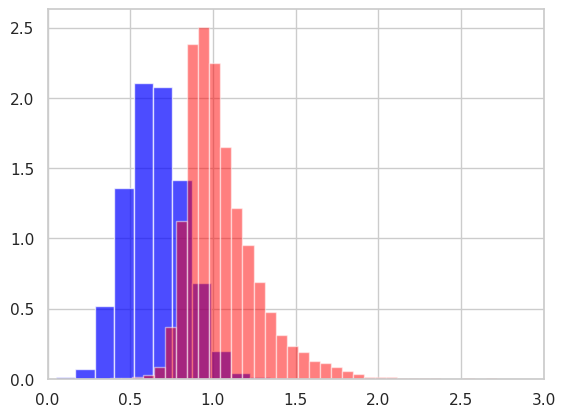

In [182]:
h=plt.hist(g_r_s,bins=150,density=True,edgecolor='white',color='blue',alpha=0.7)
plt.hist(g_r_e,bins=150,density=True, color='red',edgecolor='white',alpha=0.5)
plt.xlim(0,3)
plt.show()

In [183]:
#se ordenan los datos para calcular y graficar la acumulada
g_r_s.sort_values()

160069    -0.42022
87339     -0.10344
121240    -0.09943
101316    -0.08104
24284     -0.06453
            ...   
41631      5.46807
89988      6.58557
168704     7.45551
19569     11.56471
79110     17.20762
Name: G - R, Length: 10235, dtype: float64

In [184]:
g_r_e.sort_values()

59031      0.37701
27223      0.43917
8435       0.48024
160111     0.49602
15731      0.53466
            ...   
130175     2.66690
118039     2.71117
58525      2.74906
43370      3.12234
33382     10.40107
Name: G - R, Length: 10336, dtype: float64

In [185]:
x=g_r_s.sort_values()
xe=g_r_e.sort_values()
y0=np.arange(0,10235,1)
ye=(np.arange(0,10336,1)/10336)
y=y0/len(y0)
print(len(y0))
print(len(y))

10235
10235


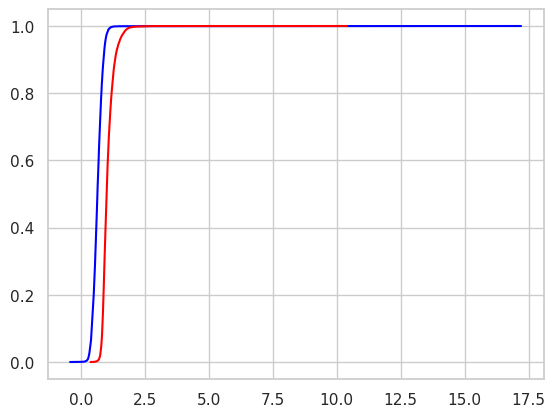

In [186]:
plt.plot(x,y,color='blue')
plt.plot(xe,ye,color='red')
plt.show()

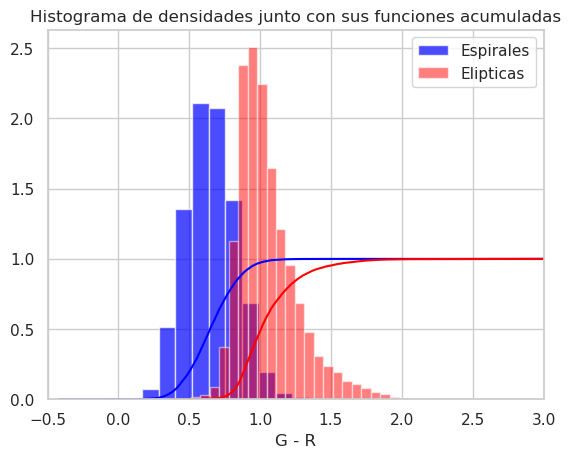

In [187]:
h=plt.hist(g_r_s,bins=150,density=True,edgecolor='white', label='Espirales',color='blue',alpha=0.7)
plt.hist(g_r_e,bins=150,density=True, color='red',edgecolor='white',alpha=0.5,label='Elipticas')
plt.plot(x,y,color='blue')
plt.plot(xe,ye,color='red')
plt.xlim(-0.5,3)
plt.xlabel('G - R')
plt.title('Histograma de densidades junto con sus funciones acumuladas')
plt.legend()
plt.show()

In [188]:
g_r_e = np.random.choice(g_r_e, size=10235)  #Se elije una muestra aleatoria del mismo tamaño que las espirales porque el test KS necesita dos distribuciones del mismo tamaño

In [192]:
ks_statistic, p_value = stats.ks_2samp(g_r_s, seleccion)
print("Valor de estadística K-S:", ks_statistic)
print("Valor p:", "{:e}".format(p_value))

Valor de estadística K-S: 0.755837811431363
Valor p: 0.000000e+00


Para este caso vemos que el p-value nos da cero, lo que significa que las distribuciones no son nada comparables entre si. El metodo KS es muy sensible a pequeñas diferencias, por lo que sería recomendado usarlo para distribuciones que a simple vista no se puedan distinguir. 

**2.2 PROBLEMA 3**

Estudie la distribución de tipos morfológicos y determine si la misma es consistente con una distribución uniforme.

Para ello se seleccionaron distintos valores de corte para distinguir entre galaxias espirales y elipticas. Desde 0.5 a 1, poniendo el mismo limite para ambos tipos. Luego, para cada uno de los cortes se comparó con una distribucion uniforme mediante el método del chi cuadrado. 

In [193]:
n_e=df[df['E']==1]
n_s=df[df['S']==1]

n_e1=df[df['E']>0.9]
n_s1=df[df['S']>0.9]

n_e2=df[df['E']>0.8]
n_s2=df[df['S']>0.8]

n_e3=df[df['E']>0.7]
n_s3=df[df['S']>0.7]

n_e4=df[df['E']>0.6]
n_s4=df[df['S']>0.6]

n_e5=df[df['E']>0.5]
n_s5=df[df['S']>0.5]

In [194]:
print('para un corte de 0.9 tengo',len(n_e1),'galaxias elipticas y',len(n_s1),'galaxias espirales')
print('para un corte de 0.8 tengo',len(n_e2),'galaxias elipticas y',len(n_s2),'galaxias espirales')
print('para un corte de 0.7 tengo',len(n_e3),'galaxias elipticas y',len(n_s3),'galaxias espirales')
print('para un corte de 0.6 tengo',len(n_e4),'galaxias elipticas y',len(n_s4),'galaxias espirales')
print('para un corte de 0.5 tengo',len(n_e5),'galaxias elipticas y',len(n_s5),'galaxias espirales')
print('para un corte de 1 tengo',len(n_e),'galaxias elipticas y',len(n_s),'galaxias espirales')

para un corte de 0.9 tengo 10336 galaxias elipticas y 10235 galaxias espirales
para un corte de 0.8 tengo 43378 galaxias elipticas y 19045 galaxias espirales
para un corte de 0.7 tengo 72572 galaxias elipticas y 27003 galaxias espirales
para un corte de 0.6 tengo 96991 galaxias elipticas y 36245 galaxias espirales
para un corte de 0.5 tengo 113755 galaxias elipticas y 44998 galaxias espirales
para un corte de 1 tengo 1177 galaxias elipticas y 2675 galaxias espirales


In [195]:
x=[0.5,0.6,0.7,0.8,0.9,1]
ye=[len(n_e5)/(len(n_e5)+len(n_s5)),len(n_e4)/(len(n_e4)+len(n_s4)),len(n_e3)/(len(n_e3)+len(n_s3)),len(n_e2)/(len(n_e2)+len(n_s2)),len(n_e1)/(len(n_e1)+len(n_s1)),len(n_e)/(len(n_e)+len(n_s))]

ys=[len(n_s5)/(len(n_e5)+len(n_s5)),len(n_s4)/(len(n_e4)+len(n_s4)),len(n_s3)/(len(n_e3)+len(n_s3)),len(n_s2)/(len(n_e2)+len(n_s2)),len(n_s1)/(len(n_e1)+len(n_s1)),len(n_s)/(len(n_e)+len(n_s))]

ym=[0.5,0.5,0.5,0.5,0.5,0.5]

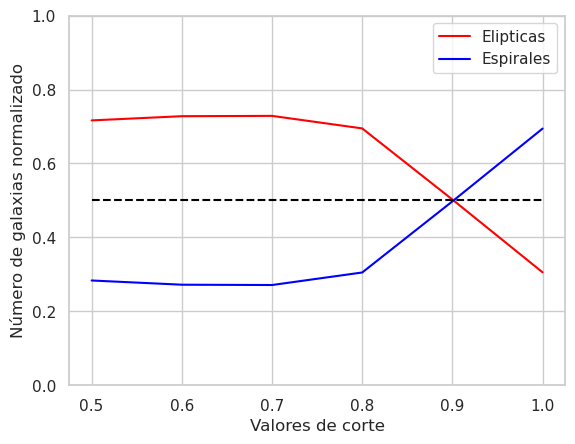

In [196]:
plt.plot(x,ye,label='Elipticas',color='red')
plt.plot(x,ys,label='Espirales',color='blue')
plt.plot(x,ym,color='black',linestyle='--')
plt.ylim(0,1)
plt.xlabel('Valores de corte')
plt.ylabel('Número de galaxias normalizado')
plt.legend()
plt.show()

In [52]:
#Calculo las frecuencias para los distintos cortes
ft=0.5
fo5_s=len(n_s5)/(len(n_e5)+len(n_s5))
fo5_e=len(n_e5)/(len(n_e5)+len(n_s5))

fo4_s=len(n_s4)/(len(n_e4)+len(n_s4))
fo4_e=len(n_e4)/(len(n_e4)+len(n_s4))

fo3_s=len(n_s3)/(len(n_e3)+len(n_s3))
fo3_e=len(n_e3)/(len(n_e3)+len(n_s3))

fo2_s=len(n_s2)/(len(n_e2)+len(n_s2))
fo2_e=len(n_e2)/(len(n_e2)+len(n_s2))

fo1_s=len(n_s1)/(len(n_e1)+len(n_s1))
fo1_e=len(n_e1)/(len(n_e1)+len(n_s1))

fo_s=len(n_s)/(len(n_e)+len(n_s))
fo_e=len(n_e)/(len(n_e)+len(n_s))

In [53]:
#comparar ambas distribuciones con el chi  cuadrado
chi=((fo5_e - ft)**2/ft) +( (fo5_s - ft)**2/ft)
f=st.chi2.cdf(chi,1) # calcula la función de distribución acumulativa (CDF) de una distribución chi-cuadrado con 1 grados de libertad en un valor específico chi
p=1-f
print('el chi2 para un corte de 0.5 es de',chi,'y el p-value es de',p)

chi=((fo4_e - ft)**2/ft) +( (fo4_s - ft)**2/ft)
f=st.chi2.cdf(chi,1)
p=1-f
print('el chi2 para un corte de 0.6 es de',chi,'y el p-value es de',p)

chi=((fo3_e - ft)**2/ft) +( (fo3_s - ft)**2/ft)
f=st.chi2.cdf(chi,1)
p=1-f
print('el chi2 para un corte de 0.7 es de',chi,'y el p-value es de',p)

chi=((fo2_e - ft)**2/ft) +( (fo2_s - ft)**2/ft)
f=st.chi2.cdf(chi,1)
p=1-f
print('el chi2 para un corte de 0.8 es de',chi,'y el p-value es de',p)

chi=((fo1_e - ft)**2/ft) +( (fo1_s - ft)**2/ft)
f=st.chi2.cdf(chi,1)
p=1-f
print('el chi2 para un corte de 0.9 es de',chi,'y el p-value es de',p)

chi=((fo_e - ft)**2/ft) +( (fo_s - ft)**2/ft)
f=st.chi2.cdf(chi,1)
p=1-f
print('el chi2 para un corte de 1 es de',chi,'y el p-value es de',p)

el chi2 para un corte de 0.5 es de 0.1875814793607609 y el p-value es de 0.6649372003803595
el chi2 para un corte de 0.6 es de 0.20787018371920912 y el p-value es de 0.6484418782142365
el chi2 para un corte de 0.7 es de 0.20942974611720702 y el p-value es de 0.6472147306947511
el chi2 para un corte de 0.8 es de 0.15195046690037703 y el p-value es de 0.6966783474131586
el chi2 para un corte de 0.9 es de 2.4106376721282827e-05 y el p-value es de 0.9960825425663242
el chi2 para un corte de 1 es de 0.15123456790123452 y el p-value es de 0.6973583418774758




En el gráfico de arriba podemos ver que para un corte de 0.9 las lineas se cortan en 0.5, indicando que para ese valor de corte las distribuciones son muy similares a una uniforme. Esto además se puede chequear viendo que para ese corte se obtuvo el menor valor de chi cuadrado y el p-value mas cercano a uno. Para los demas cortes vemos que el p-value disminuye indicando que las distribuciones son menos comparables. 

**2.3 PROBLEMA 4**

Grafique las magnitudes aparentes de galaxias en la banda r en función de las magnitudes en la banda g, y
obtenga un ajuste para la relación entre ambas.

In [127]:
g_e=elip['G']
g_s=spir['G']

r_e=elip['R']
r_s=spir['R']

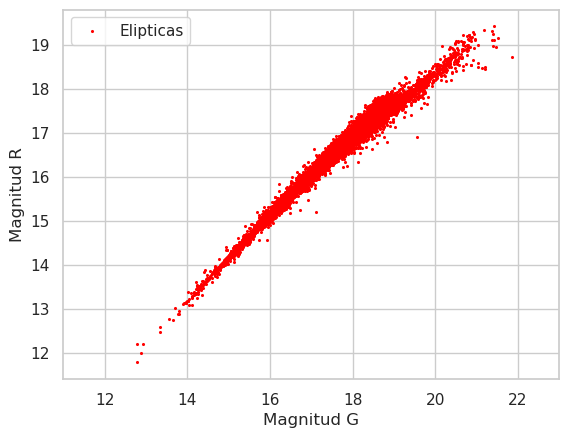

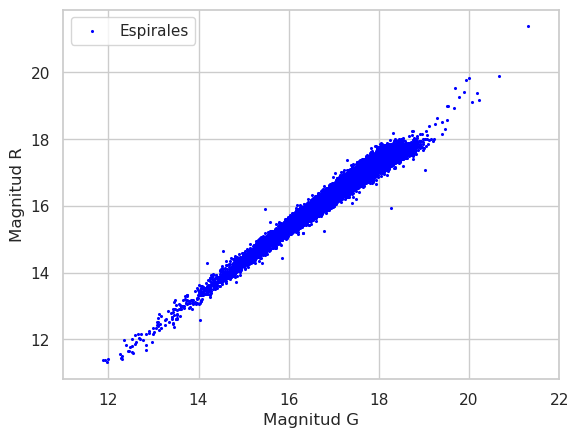

In [202]:
plt.scatter(g_e,r_e,label='Elipticas',color='red',s=1.5)
plt.xlabel('Magnitud G')
plt.ylabel('Magnitud R')
plt.legend()
plt.xlim(11,23)
plt.show()

plt.scatter(g_s,r_s,s=1.5,label='Espirales',color='blue')
plt.xlabel('Magnitud G')
plt.ylabel('Magnitud R')
plt.legend()
plt.xlim(11,22)
plt.show()


Viendo la tendencia de los datos en los graficos superiores, vemos que se le puede ajustar una recta en ambos casos y luego comparar sus coeficientes para ver las diferencias. 
Para realizar el ajuste de una recta se usa el método de regresión lineal. 

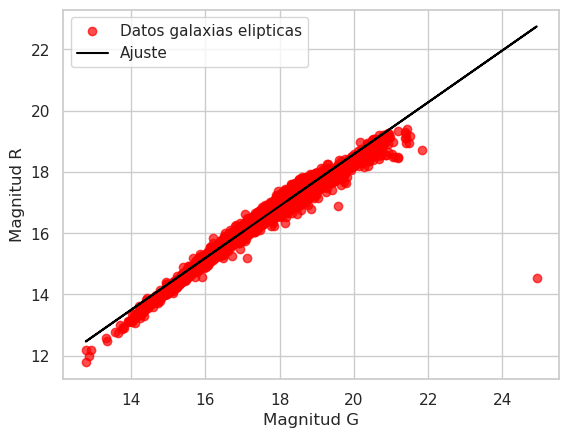

Slope: 0.8470090741235886
Intercept: 1.6376266508306936


In [200]:
#Ahora hay que hacer un ajuste lineal a cada uno de los graficos
#empezamos con las elipticas

# Realizar la regresion  lineal
slope, intercept = np.polyfit(g_e, r_e, 1)

# Crear la funcion para la regresion lineal 
regression_line = slope * g_e + intercept

# Grafico de los datos y el ajuste
plt.scatter(g_e, r_e, label='Datos galaxias elipticas', color='red',alpha=0.7)
plt.plot(g_e, regression_line, label='Ajuste', color='black')
plt.xlabel('Magnitud G')
plt.ylabel('Magnitud R')
plt.legend()
plt.show()

#Los parametros de la recta son: 
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")


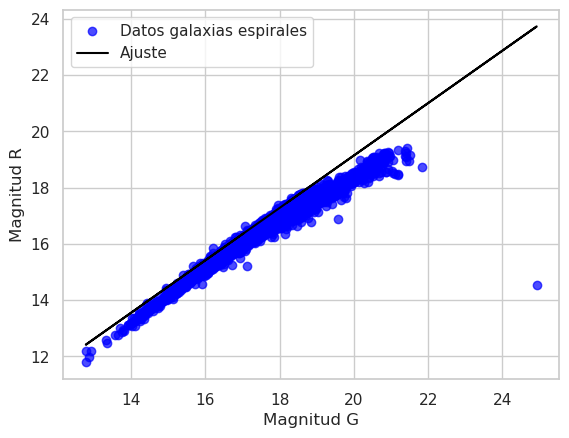

Slope: 0.9322037657487667
Intercept: 0.4954709925889744


In [201]:
#ahora para la espirales

# Realizar la regresion  lineal
slope, intercept = np.polyfit(g_s, r_s, 1)

# Crear la funcion para la regresion lineal 
regression_line = slope * g_e + intercept

#Grafico 
plt.scatter(g_e, r_e, label='Datos galaxias espirales', color='blue',alpha=0.7)
plt.plot(g_e, regression_line, label='Ajuste', color='black')
plt.xlabel('Magnitud G')
plt.ylabel('Magnitud R')
plt.legend()
plt.show()

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Para las galaxias elipticas vemos que la recta de ajuste y=ax + b tiene como coeficientes a: 0.8470090741235886 y b: 1.6376266508306936


mientras que para las galaxias espiriales, si y=cx + d, sus coeficientes son c: 0.9322037657487667 y d: 0.4954709925889744.


**2.4 PROBLEMA 5**

Calcule la magnitud absoluta para cada galaxia, usando la aproximación:
M = m − 25 − 5 · log10(c.z/H)


donde c es la velocidad de la luz y H = 75 km s−1/M pc. Grafique la magnitud absoluta vs. el redshift para
todas las galaxias con mr < 17.5, y obtenga un ajuste para la envolvente de los puntos.
Discuta en el informe el origen de la forma de los puntos y el procedimiento para el ajuste del modelo.

Ademas del limite en magnitudes se seleccionaron datos poniendo un limite en redshift. Se tomaron los z<0.15 porque los objetos con z mayores a ese limite probablemente no sean galaxias si no quasares que quedaron en la muestra de datos. 

In [103]:
M=df[df['R']<17.5]

In [104]:
M=M[M['Z']>0.002]

In [105]:
M=M[M['Z']<0.15]

In [106]:
M

,ID,R,U,G,Z,E,S
0,1237645941824356443,15.15269,17.88993,15.75731,0.040287,0.264,0.585
2,1237645942905438473,15.51829,17.71016,16.15184,0.025475,0.000,1.000
14,1237645942905897117,17.32762,20.04548,18.42381,0.082322,0.821,0.071
22,1237645943973609618,17.40380,20.33023,18.30791,0.074452,0.606,0.273
23,1237645943976493208,16.80213,18.84962,17.41280,0.036489,0.443,0.475
...,...,...,...,...,...,...,...
172924,1237661064954708099,16.72701,19.37430,17.60748,0.082433,0.885,0.038
172931,1237661064955428931,16.13644,18.82567,17.03439,0.075387,0.925,0.075
172932,1237661064955560158,16.60361,18.35402,17.19765,0.051560,0.567,0.400
172933,1237661064956281147,16.33947,18.76963,17.12151,0.031370,0.545,0.394


In [107]:
import math
# Define una función para calcular Mr
def calcular_Mr(row):
    return row["R"] - 25 - 5 * math.log10((c * row["Z"]) / H)

# Constantes c y H
c = 300000
H = 75

# Aplica la función a cada fila del DataFrame
M["Mr"] = M.apply(calcular_Mr, axis=1)

In [108]:
M

,ID,R,U,G,Z,E,S,Mr
0,1237645941824356443,15.15269,17.88993,15.75731,0.040287,0.264,0.585,-20.883420
2,1237645942905438473,15.51829,17.71016,16.15184,0.025475,0.000,1.000,-19.522555
14,1237645942905897117,17.32762,20.04548,18.42381,0.082322,0.821,0.071,-20.260249
22,1237645943973609618,17.40380,20.33023,18.30791,0.074452,0.606,0.273,-19.965876
23,1237645943976493208,16.80213,18.84962,17.41280,0.036489,0.443,0.475,-19.018971
...,...,...,...,...,...,...,...,...
172924,1237661064954708099,16.72701,19.37430,17.60748,0.082433,0.885,0.038,-20.863805
172931,1237661064955428931,16.13644,18.82567,17.03439,0.075387,0.925,0.075,-21.260349
172932,1237661064955560158,16.60361,18.35402,17.19765,0.051560,0.567,0.400,-19.968271
172933,1237661064956281147,16.33947,18.76963,17.12151,0.031370,0.545,0.394,-19.153434


In [109]:
Mr=M['Mr']
z=M['Z']

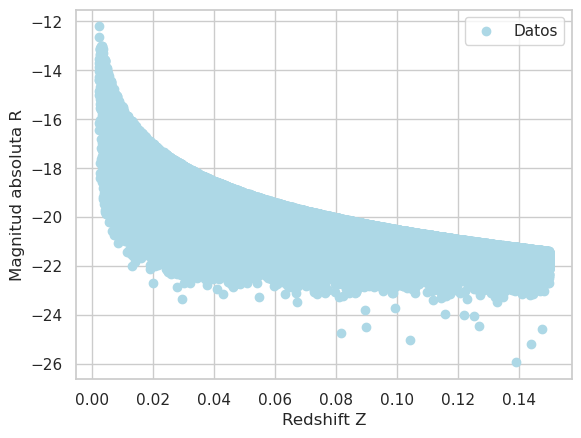

In [203]:
plt.scatter(z,Mr,color='lightblue',label='Datos')
plt.xlabel('Redshift Z')
plt.ylabel('Magnitud absoluta R')
plt.legend()
plt.show()

Para realizar el ajuste tengo tomar los datos de la envolvente del gráfico, no puedo usar todos. Entonces lo primero es armar un nuevo conjunto con estos datos. Para ello se va a usar el codigo binned_statistic que toma intervalos en x de un tamaño dado y le calcula el estadistico que se le pida. Este código tiene la forma : "bin_means, bin_edges, binnumber = st.binned_statistic(data1, data2, statistic='mean', bins=bin_edges)" donde la cantidad de intervalos (o bines) se coloca en bin_edges y en nuestro caso data1 y data2 serian los valores de redshift y magnitud absoluta. En este ejemplo calcula la media de los datos dentro de cada bin con el estadistico 'mean', para nuestro caso usaremos la palabra 'max' que indica que calcule el máximo de magnitud en ese intervalo. 

La función devuelve bin_means, que contiene el valor estadístico calculado para cada bin, y bin_edges, que son los límites de los bins utilizados. También proporciona binnumber, que es un arreglo que indica a qué bin pertenece cada punto de datos. 



In [78]:
mag = st.binned_statistic(z,Mr,statistic='max',bins=50)[0] #Aca quiero el estadistico calculado, en este caso el maximo, por lo tanto quiero el primer valor, por eso el [0]
z1 = st.binned_statistic(z,Mr,statistic='max',bins=50)[1] #Aca quiero el z correspondiente a cada bin.Por lo tanto le pido el segundo valor que es el que indica a que bin corresponde cada dato Mr 

Se seleccionaron 50 intervalos ya que son los suficientes para muestrear la forma correcta de la envolvente pero no demasiados que me generen ruido. Este número puede cambiarse e ir viendo los distintos resultados. 

In [79]:
print(len(mag))
print(len(z1))

50
51


In [101]:
#solo me quedo con 50 datos de z que son la cantidad de datos que tengo de magnitudes
z1=z1[0:50]

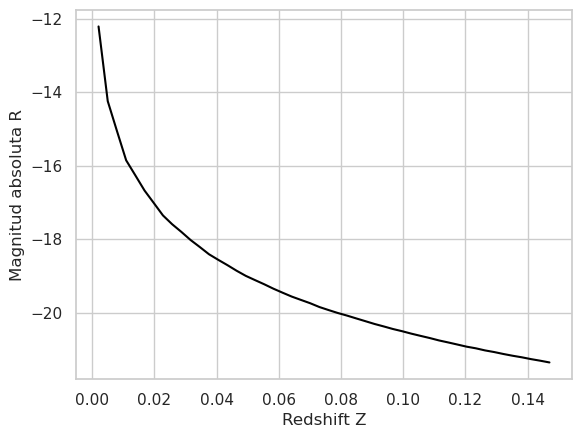

In [118]:
plt.plot(z1,mag,color='black')
plt.xlabel('Redshift Z')
plt.ylabel('Magnitud absoluta R')
plt.show()

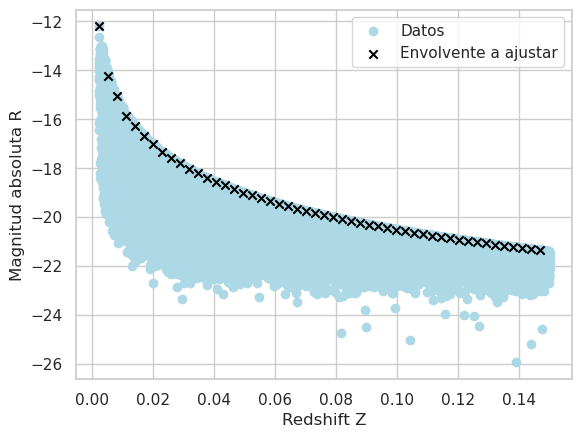

In [119]:
#viendo todo en un mismo grafico
plt.scatter(z,Mr,color='lightblue',label='Datos')
plt.scatter(z1,mag,marker='x',color='black',label='Envolvente a ajustar')
plt.xlabel('Redshift Z')
plt.ylabel('Magnitud absoluta R')
plt.legend()
plt.show()

Para el ajuste de la envolvente se utilizó la biblioteca SciPy, que proporciona la función scipy.interpolate.UnivariateSpline. Esta función permite ajustar una spline cúbica a datos arbitrarios. 

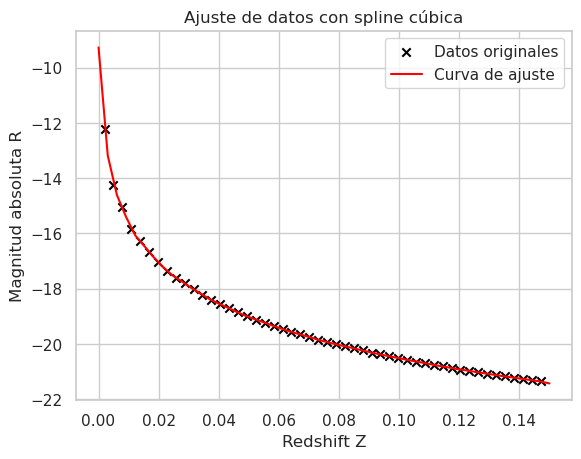

In [160]:
#entonces los datos a ajustar son las cruces. 
from scipy.interpolate import UnivariateSpline


# Crear la spline cúbica
spline = UnivariateSpline(z1, mag, k=3, s=0)

# Generar puntos para la curva ajustada
x_new = np.linspace(0, 0.15, 50)
y_new = spline(x_new)

# Graficar los datos originales y la spline ajustada
plt.scatter(z1, mag, label='Datos originales',color='black',marker='x')
plt.plot(x_new, y_new, label='Curva de ajuste', color='red')
plt.legend()
plt.xlabel('Redshift Z')
plt.ylabel('Magnitud absoluta R')
plt.title('Ajuste de datos con spline cúbica')
plt.grid(True)
plt.show()


**3.CONCLUSIONES**

El uso de SQL junto con la biblioteca Pandas nos permiten tanto la obtencion como la manipulacion de datos de manera sencilla y practica para poder posteriormente analizarlos y comparar diferentes caracteristicas/parametros de los objetos en cuestion.